<img src='https://www.relyonhorror.com/wp-content/uploads/2012/04/player_1_start-e1333433768548.jpg' align="center">

<h1> Venda de jogos de videogames na História </h1>
<br>
O mercado de jogos eletrônicos é um dos que mais movimenta dinheiro, na casa de centenas de bilhões por ano. A partir da base de dados <a href='https://www.kaggle.com/gregorut/videogamesales'>neste dataset</a>, será realizada algumas análises.

### Descrição das váriaveis encontradas no dataset

|Variáveis | Descrição |
|-----------|-----------|
|Rank|Posição no ranking de vendas|
|Name|Nome do jogo|
|Platform|Plataforma em que o jogo foi liberado(PC,PS4,Xbox,etc.)|
|Year|Ano de lançamento do jogo|
|Genre|Gênero do jogo|
|Publisher|Empresa que publicou o jogo|
|NA_Sales|Vendas na América do Norte (em milhões de dólares)|
|EU_Sales|Vendas na Europa (em milhões de dólares)|
|JP_Sales|Vendas no Japão (em milhões de dólares)|
|Other_sales|Vendas no restante do mundo (em milhões de dólares)|
|Global_sales|Total de vendas no mundo inteiro|

#### Importando bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
#Leitura do arquivo
videogames = pd.read_csv('vgsales.csv')

In [5]:
#Verificando o dataset
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
#Resumo das informações em todas colunas
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
#Quantidade de linhas e colunas
videogames.shape

(16598, 11)

In [11]:
#Tipo de dados em cada coluna
videogames.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [14]:
#Renomeando as colunas
videogames.columns = ['Ranking','Nome','Plataforma','Ano', 'Gênero','Editora','Vendas América do Norte','Vendas Europa',
                  'Vendas Japão', 'Outras vendas', 'Vendas Global']

In [15]:
# Verificando as novas colunas
videogames.head()

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas Europa,Vendas Japão,Outras vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
#Verificando linhas onde não há ano de lançamento definido
videogames[videogames['Ano'].isnull()].head()

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas Europa,Vendas Japão,Outras vendas,Vendas Global
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


#### Análise Gráficas

In [17]:
# Qual a quantidade de jogos lançados por plataformas
videogames['Plataforma'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Plataforma, dtype: int64

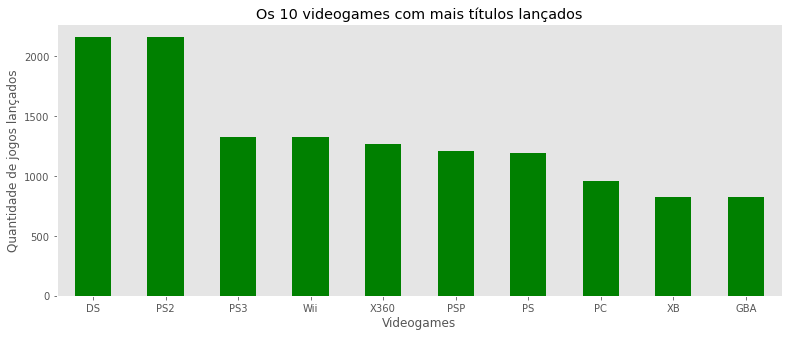

In [18]:
#Criando um gráfico de barras com os 10 videogames com mais títulos lançados
videogames['Plataforma'].value_counts().head(10).plot(kind='bar', figsize=(13,5), grid=False, rot=0, color='green')

#Enfeitando o gráfico. Abaixo, definimos um título
plt.title('Os 10 videogames com mais títulos lançados')
plt.xlabel('Videogames')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

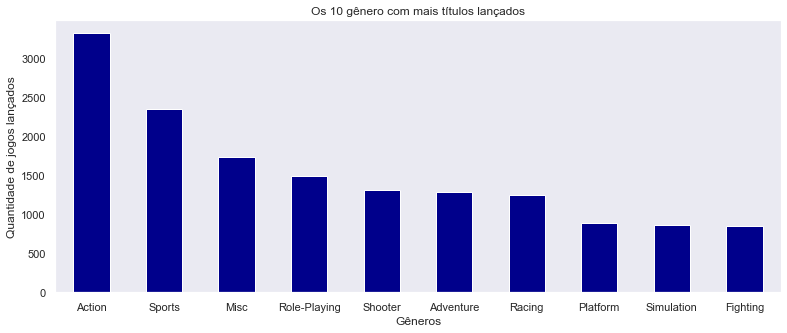

In [34]:
#Criando um gráfico de barras com os 10 gêneros com mais títulos lançados
videogames['Gênero'].value_counts().head(10).plot(kind='bar', figsize=(13,5), grid=False, rot=0, color='darkblue')

#Enfeitando o gráfico. Abaixo, definimos um título
plt.title('Os 10 gênero com mais títulos lançados')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

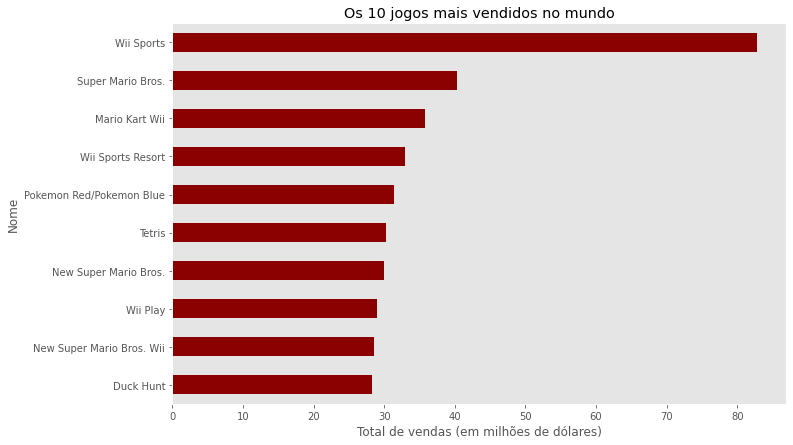

In [19]:
#Criando um gráfico com os 10 jogos mais vendidos da história
top_10 = videogames[['Nome', 'Vendas Global']].head(10).set_index('Nome').sort_values('Vendas Global', ascending=True)
top_10.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)

plt.title('Os 10 jogos mais vendidos no mundo')
plt.xlabel('Total de vendas (em milhões de dólares)')
plt.show()

In [22]:
#Criando um crosstab entre Plataforma e Gênero
crosstab_vg = pd.crosstab(videogames['Plataforma'], videogames['Gênero'])
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [24]:
#Somando as colunas e alocando em uma nova coluna "Total"
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Plataforma,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,266
3DO,0,1,0,0,0,1,0,0,0,1,0,0,6
3DS,182,37,14,53,28,20,11,86,7,30,26,15,1018
DC,3,11,12,0,2,0,6,4,3,1,10,0,104
DS,343,240,36,393,92,238,67,200,42,285,148,79,4326


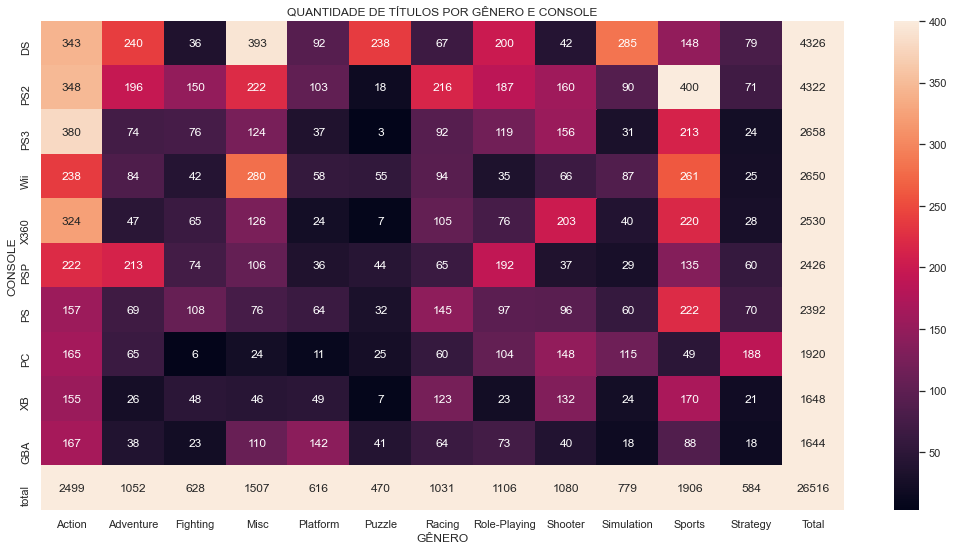

In [31]:
#Criando um heatmap com Plataforma e Gênero
top_plataforma = crosstab_vg[crosstab_vg['Total']>1600].sort_values('Total', ascending=False)
top10_final = top_plataforma.append(pd.DataFrame(top_plataforma.sum(), columns=['total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), 
            vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('GÊNERO')
plt.ylabel('CONSOLE')
plt.title('QUANTIDADE DE TÍTULOS POR GÊNERO E CONSOLE')
plt.show()